# Own Kernel Density Function

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
# the K function
def kernel_function(x,valueG,h,d=1):
    '''
    Parameters
    ----------
         x: Observation data
         h: windows size
         d: dimension
         valueG: Gaussian value
    
    Returns
    -------
      the k value   
    '''
    
    result = math.exp((-1/2)* ((valueG-x)/h)**2)
    return result

def kernel_density_function(obs_data,gaussianData,h,d=1):
    '''
    Parameters
    ----------
         obs_data: Observation data  
         h: windows size
         d: dimension
         gaussianData: generate from gaussian

    Returns
    -------
      the KDF
    '''
    final_result = []
    # Size of the gaussian data
    size = len(gaussianData)
    for obs in obs_data:
        k_result = 0
        for g in gaussianData:
            k_result = k_result + ((1/ (size * h * math.sqrt(2*math.pi)))* kernel_function(obs,g,h))
        final_result.append(k_result)
    return final_result

def formula_normal_distribution(loc,scale,observation):
    '''
    Parameters
    ----------
         loc: Mean of the distribution ; where the peak of the bell exists
         scale : standard of deviation ; how flat the graph distribution should be.
         sample : the distribution

    Returns
    -------
      out: ndarray
      The Normal (Gaussian) Distribution
    '''
    results= []
    for value in observation:
        f = (1/(math.sqrt(2*math.pi)*scale)) * math.exp(-0.5*((value-loc)/scale)**2)
        results.append(f)
    return results

def formula_exponential_distribution(lamb,observation):
  '''
    The exponential distribution describes the time between events in a Poisson point process, i.e., 
    a process in which events occur continuously and independently at a constant average rate. 
    Parameters
    ----------
         lamb: rate parameter (lambda)
         observation : the sample

    Returns
    -------
      out: ndarray
      The Exponential Distribution
  '''
  pdf = []
  for value in observation:
    if value<=0:
      pdf.append(0) 
    else:
      pdf.append(lamb * math.exp(-lamb * value))
  return pdf

def factorial(n):
    final_product = 1
    for i in range(n, 0, -1):
        final_product *= i
    return final_product

def formula_gamma_distribution(a,b,observation):
  '''
    The gamma distribution is a two-parameter family of continuous probability distributions. 
    While it is used rarely in its raw form but other popularly used distributions like exponential, 
    chi-squared, erlang distributions are special cases of the gamma distribution.
    Parameters
    ----------
         a: a shape parameter
         b: scale parameter  
         observation : the sample

    Returns
    -------
      out: ndarray
      The Gamma Distribution
  '''
  inv_scale = 1 / b # omega 
  pdf = []
  for value in observation:
    result = ((inv_scale**a) * (value**(a-1)) * math.exp(-inv_scale*value)) / factorial(a-1)
    pdf.append(result)
  return pdf

def formula_poisson_distribution(observation,lamb):
  '''
    Poisson random variable is typically used to model the number of times an event happened in a time interval.
    ----------
         observation: The probability of observing k events (sample)
         lamb: lambda parameter ,The average number of events in an interval is designated 
         
    Returns
    -------
      out: ndarray
      The Poisson Distribution
  '''
  pdf = []
  if lamb > 0 :
    for k in observation :
      result = (math.exp(-lamb) * lamb**k) / factorial(int(k))
      #print(result)
      pdf.append(result)
      #print(pdf)
    return pdf
  else:
    return "The parameter lambda must be superior than 0"
  


# Observation range 
obs_data = np.arange(-5,8,0.05)

gaussian_data = np.random.normal(1,2,20000)

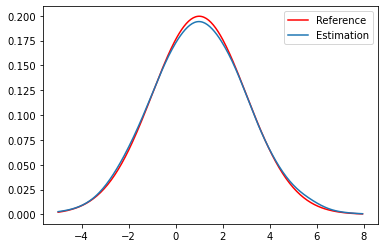

In [2]:
# formula Ok
reference_gaussian_data = formula_normal_distribution(1,math.sqrt(4),obs_data)

estimation_data = kernel_density_function(obs_data,gaussian_data,0.5,1)
#print(estimation_data)
fig, ax = plt.subplots()
ax.plot(obs_data,reference_gaussian_data,label='Reference',color='red')
ax.plot(obs_data,estimation_data,label='Estimation')

plt.legend()
plt.show()
# generate the gaussian distribution
#gaussian = formula_normal_distribution(np.mean(dist),np.std(dist),dist)
#kernel = kernel_density_function(dist,gaussian,0.1)
#print(gaussian)
#plt.hist(dist,bins=100, density=True, label='Sample')
#plt.plot(gaussian)

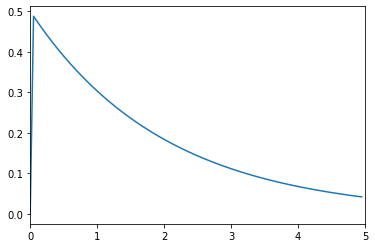

In [3]:
# Observation range 
obs_data = np.arange(0,5,0.05)
reference_expo_data = formula_exponential_distribution(0.5,obs_data)
#print(reference_expo_data)
plt.xlim([0,5])
plt.plot(obs_data,reference_expo_data)
plt.show()

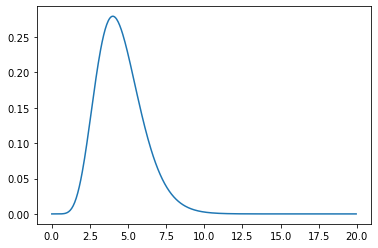

In [4]:
# Observation range 
obs_data = np.arange(0,20,0.05)
reference_gamma_data = formula_gamma_distribution(9,0.5,obs_data)
#print(reference_expo_data)
#plt.xlim([0,5])
plt.plot(obs_data,reference_gamma_data)
plt.show()

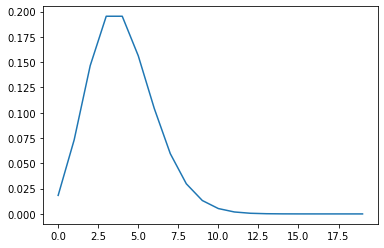

In [5]:
# Observation range 
obs_data = np.arange(0,20)
#k = np.arange(2,10)
reference_poisson_data = formula_poisson_distribution(obs_data,4)
#print(reference_poisson_data)
#plt.xlim([0,20])
plt.plot(obs_data,reference_poisson_data)
plt.show()